In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,Day,Month,Year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
1,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
2,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
3,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
4,6.0,6.0,2012.0,31.0,67.0,14.0,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,0


In [4]:
df.isnull().sum()

Day            1
Month          1
Year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        0
Region         0
dtype: int64

In [5]:
df=df.dropna().reset_index(drop=True)

In [6]:
df.drop(['Day','Month','Year'],axis=1,inplace=True)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
1,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
2,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
3,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
4,31.0,67.0,14.0,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,0


In [8]:
df['Classes'].value_counts()

Classes
fire             131
not fire          99
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [9]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [10]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
236,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
237,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
238,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
239,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
240,24.0,64.0,15.0,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [11]:
X = df.drop('FWI',axis=1)
y=df['FWI']

In [12]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0,0
1,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0,0
2,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0
3,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0,0
4,31.0,67.0,14.0,0.0,82.6,5.8,22.2,3.1,7.0,1,0


In [13]:
y

0      0.4
1      0.1
2      0.0
3      0.5
4      2.5
      ... 
236    6.5
237    0.0
238    0.2
239    0.7
240    0.5
Name: FWI, Length: 241, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [15]:
X_train.shape,X_test.shape

((180, 11), (61, 11))

In [16]:
# feature selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656946,-0.252904,-0.348006,0.700645,0.491823,0.369907,0.622687,0.462847,0.551426,0.255432
RH,-0.656946,1.000000,0.220308,0.224067,-0.645047,-0.388209,-0.206514,-0.694734,-0.334208,-0.452533,-0.397319
Ws,-0.252904,0.220308,1.000000,0.263912,-0.139841,-0.015236,0.071773,0.036368,0.017746,-0.060780,-0.211736
Rain,-0.348006,0.224067,0.263912,1.000000,-0.549252,-0.272625,-0.286610,-0.327071,-0.283296,-0.340350,-0.097040
FFMC,0.700645,-0.645047,-0.139841,-0.549252,1.000000,0.593203,0.500344,0.726772,0.579730,0.750220,0.250550
DMC,0.491823,-0.388209,-0.015236,-0.272625,0.593203,1.000000,0.877036,0.664095,0.983677,0.597677,0.198384
DC,0.369907,-0.206514,0.071773,-0.286610,0.500344,0.877036,1.000000,0.512762,0.947280,0.511919,-0.094616
ISI,0.622687,-0.694734,0.036368,-0.327071,0.726772,0.664095,0.512762,1.000000,0.628597,0.734849,0.269442
BUI,0.462847,-0.334208,0.017746,-0.283296,0.579730,0.983677,0.947280,0.628597,1.000000,0.587736,0.093630
Classes,0.551426,-0.452533,-0.060780,-0.340350,0.750220,0.597677,0.511919,0.734849,0.587736,1.000000,0.202137


<Axes: >

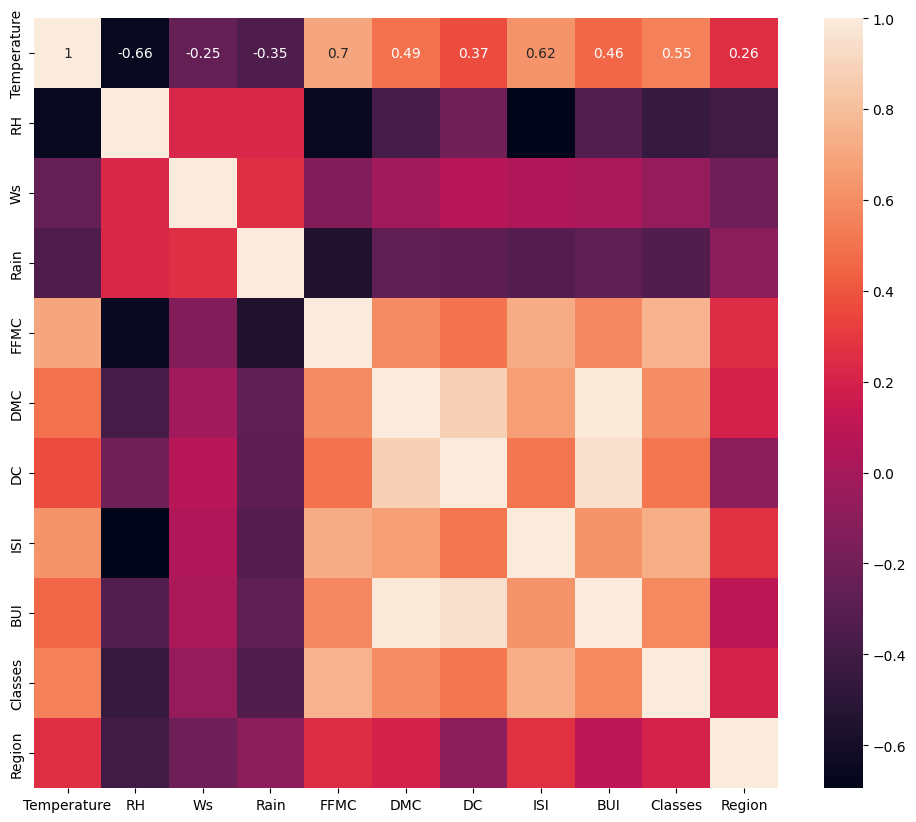

In [17]:
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [18]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [19]:
# threshold domain expertise
corr_features=correlation(X_train,0.85)

In [20]:
# drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape


((180, 9), (61, 9))

In [21]:
# feature scaling or standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaler=scaler.fit_transform(X_train)
X_test_scaler=scaler.fit_transform(X_test)

In [22]:
X_train_scaler

array([[-0.29031259,  0.54985277,  0.53825452, ..., -0.7696063 ,
        -1.1055416 , -0.98894994],
       [-0.02639205, -0.50305679, -0.58397498, ...,  0.06721104,
         0.90453403,  1.01117353],
       [ 2.08497227, -2.08242111, -0.20989848, ...,  2.8406628 ,
         0.90453403,  1.01117353],
       ...,
       [-2.66559746,  1.53695547, -0.20989848, ..., -1.1282423 ,
        -1.1055416 , -0.98894994],
       [ 1.29321065, -0.50305679, -0.20989848, ...,  0.85621025,
         0.90453403,  1.01117353],
       [-0.81815367,  1.66856917, -0.95805149, ..., -0.8413335 ,
        -1.1055416 , -0.98894994]])

Text(0.5, 1.0, 'X_train after scaling')

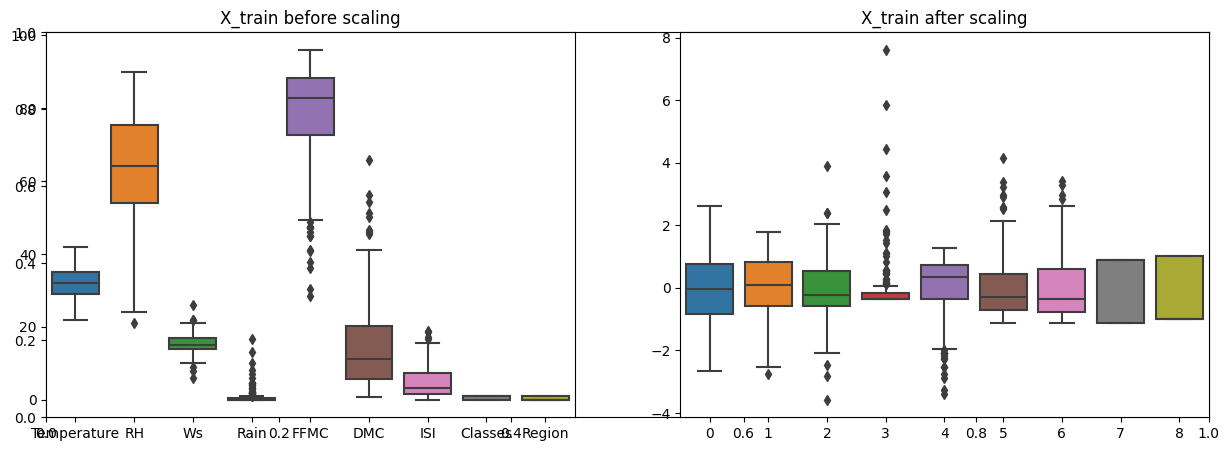

In [23]:
# box plots to understand effect of of standard scaler
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaler)
plt.title("X_train after scaling")


### Linear Regression model

Mean absolute error: 0.8011396241661747
R2 score: 0.9783980980228382


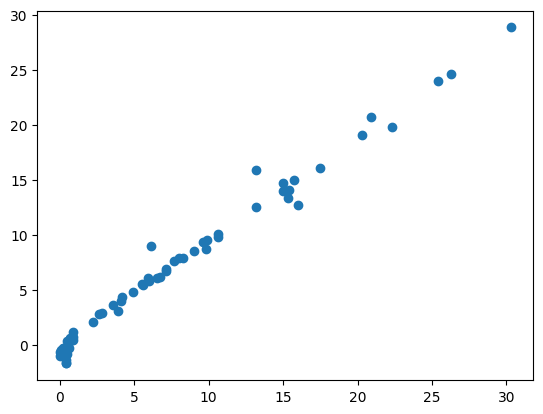

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize and fit the linear regression model
linreg = LinearRegression()
linreg.fit(X_train_scaler, y_train)

# Predict using the training data
y_pred = linreg.predict(X_test_scaler)

# Calculate mean absolute error and R2 score
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean absolute error:", mae)
print("R2 score:", score)
plt.scatter(y_test,y_pred)

## lasso Regression

Mean absolute error: 1.1451432362609906
R2 score: 0.9478304617029633


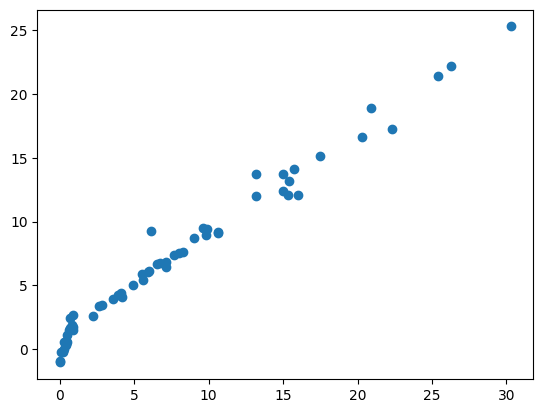

In [31]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize and fit the linear regression model
lasso=Lasso()
lasso.fit(X_train_scaler, y_train)

# Predict using the training data
y_pred = lasso.predict(X_test_scaler)

# Calculate mean absolute error and R2 score
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean absolute error:", mae)
print("R2 score:", score)
plt.scatter(y_test,y_pred)

### Ridge regression

Mean absolute error: 0.8152310215595492
R2 score: 0.9777910484638411


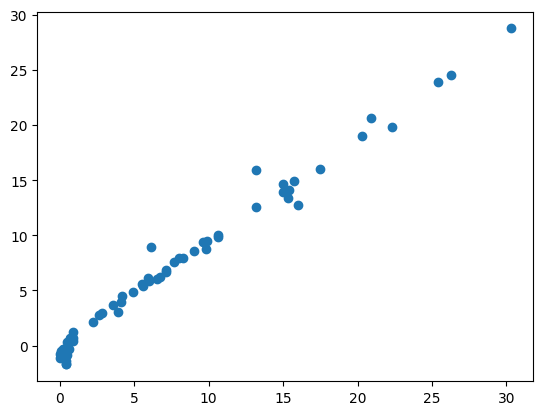

In [32]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize and fit the linear regression model
ridge = Ridge()
ridge.fit(X_train_scaler, y_train)

# Predict using the training data
y_pred = ridge.predict(X_test_scaler)

# Calculate mean absolute error and R2 score
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean absolute error:", mae)
print("R2 score:", score)
plt.scatter(y_test,y_pred)

### Elastic net

Mean absolute error: 1.8042806611904603
R2 score: 0.8817540847228864


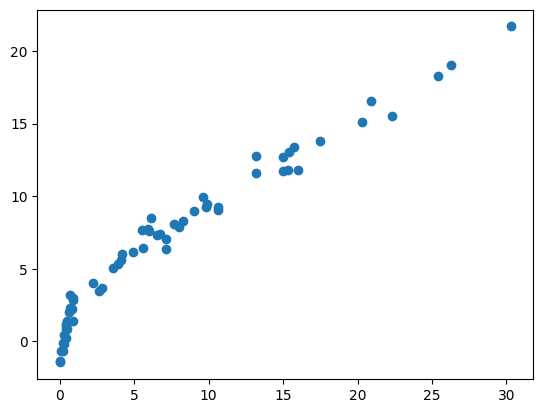

In [34]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize and fit the linear regression model
elastic = ElasticNet()
elastic.fit(X_train_scaler, y_train)

# Predict using the training data
y_pred = elastic.predict(X_test_scaler)

# Calculate mean absolute error and R2 score
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean absolute error:", mae)
print("R2 score:", score)
plt.scatter(y_test,y_pred)

In [35]:
## pickle the machine learning models, preprocessing model standard scaler

In [36]:
scaler

StandardScaler()

In [37]:
ridge

Ridge()

In [38]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))